In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

#pip install webdriver-manager
#pip install selenium

In [ ]:
# Parkrun blocked my request after a few tries, so I had to use a different approach to get the HTML content
##This command showed a forbidden error when I tried to get html content directly from the parkrun website
#print(soup.prettify()) 

Mimicing a browser to bypass parkrun's bot detection, as the html is otherwise not accessible. 

In [5]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Setup Chrome WebDriver automatically using webdriver_manager, ignore popup
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))


In [6]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
import time

# Setup Chrome options to run in headless mode (no UI)
chrome_options = Options()
chrome_options.add_argument("--headless")  # Runs Chrome in headless mode
chrome_options.add_argument("--no-sandbox")  # Disables the sandbox
chrome_options.add_argument("--disable-dev-shm-usage") 

# Setup Chrome WebDriver using webdriver_manager
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# Open the park run results page for Exeter Riverside
url = "https://www.parkrun.org.uk/exeterriverside/results/latestresults/"
driver.get(url)

# Allow page to load
time.sleep(5)


In [7]:
# Bypassing the 403 Forbidden error using Selenium and chrome WebDriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
import time

# Set up Chrome options
options = Options()
options.add_argument("--headless")  # So that it runs without a popup window
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("start-maximized")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36")

# Launch browser
driver = webdriver.Chrome(options=options)
driver.get("https://www.parkrun.org.uk/exeterriverside/results/latestresults/")

# Allow time for JS to load 
time.sleep(5)

try:
    # Get page source and check for real content
    soup = BeautifulSoup(driver.page_source, "html.parser")

    if "403 Forbidden" in soup.text:
        print("Still blocked: Server returned 403 Forbidden.")
    else:
        print("Page loaded successfully. Proceeding...")
        print(soup.prettify()[:1000])  # show a preview of the real content
finally:
    driver.quit()



Page loaded successfully. Proceeding...
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="/wp-content/themes/parkrun/favicons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="/wp-content/themes/parkrun/favicons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="/wp-content/themes/parkrun/favicons/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="/wp-content/themes/parkrun/favicons/site.webmanifest" rel="manifest"/>
  <link color="#2b233d" href="/wp-content/themes/parkrun/favicons/safari-pinned-tab.svg" rel="mask-icon"/>
  <link href="/wp-content/themes/parkrun/favicons/favicon.ico" rel="shortcut icon"/>
  <meta content="#da532c" name="msapplication-TileColor"/>
  <meta content="/wp-content/themes/parkrun/favicons/browserconfig.xml" name="msapplication-config"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta co

In [8]:
# Had problems finding the table in html, so I printed the soup to find it
tables = soup.find_all("table")

for i, table in enumerate(tables):
    print(f"\n--- Table {i} ---")
    print(table.prettify()[:500])  # Print the first bit of each table


--- Table 0 ---
<table class="Results-table Results-table--compact js-ResultsTable">
 <thead>
  <tr class="Results-table-thead">
   <th class="Results-table-th Results-table-th--position">
    Position
   </th>
   <th class="Results-table-th Results-table-th--name">
    parkrunner
   </th>
   <th class="Results-table-th Results-table-th--gender">
    Gender
   </th>
   <th class="Results-table-th Results-table-th--ageGroup">
    Age Group
   </th>
   <th class="Results-table-th Results-table-th--club">
    Club


In [9]:
# After inspecting the soup, I found the table I needed. This will be different to base code I used because parkruns are every saturday and results updated weekly

# Set up Chrome options
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("start-maximized")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36")

# Launch browser
driver = webdriver.Chrome(options=options)
driver.get("https://www.parkrun.org.uk/exeterriverside/results/latestresults/")
time.sleep(5)

# Get the page source
soup = BeautifulSoup(driver.page_source, "html.parser")
driver.quit()

# Locate the results table
table = soup.find("table", class_="Results-table")
rows = table.find_all("tr")[1:]  # skip header

data = []

for row in rows:
    cols = row.find_all("td")
    if len(cols) >= 6:
        position = cols[0].text.strip()
        name = cols[1].text.strip()
        gender = cols[2].text.strip()
        age_group = cols[3].text.strip()
        club = cols[4].text.strip()
        time_run = cols[5].text.strip()

        data.append({
            "Position": position,
            "Name": name,
            "Gender": gender,
            "Age Group": age_group,
            "Club": club,
            "Time": time_run
        })

# Convert to DataFrame
df = pd.DataFrame(data)
print(df.head(10))  # Show first 10 results to confirm, this was successful after some debugging


  Position                                               Name  \
0        1                                            Unknown   
1        2  Ben SHERLOCK114 parkruns | \n                 ...   
2        3  Ben WALKER34 parkruns | \n                    ...   
3        4  James KEANE187 parkruns | \n                  ...   
4        5                                            Unknown   
5        6  Ash VORALIA233 parkruns | \n                  ...   
6        7  Oliver MOORE28 parkruns | \n                  ...   
7        8  Fiona GERMAN96 parkruns | \n                  ...   
8        9  Matthew SMITH83 parkruns | \n                 ...   
9       10  Dylan BUFTON9 parkruns | \n                   ...   

                                Gender                Age Group  \
0                                                                 
1    Male\n                      1/181  VM40-4474.53% age grade   
2    Male\n                      2/181  JM15-1773.85% age grade   
3    Male\n     

In [10]:
df.head()

,Position,Name,Gender,Age Group,Club,Time
0,1,Unknown,,,,
1,2,Ben SHERLOCK114 parkruns | \n ...,Male\n 1/181,VM40-4474.53% age grade,,18:27PB 17:53
2,3,Ben WALKER34 parkruns | \n ...,Male\n 2/181,JM15-1773.85% age grade,City of York AC,18:33First Timer!
3,4,James KEANE187 parkruns | \n ...,Male\n 3/181,SM18-1970.25% age grade,,18:46PB 17:50
4,5,Unknown,,,,


Now that I know scraping the parkrun website works, I can clean the data using regex. 

In [11]:
import re

# Clean the "Age Group" column to remove extra percentages and text
df["Age Group"] = df["Age Group"].apply(lambda x: re.sub(r'-\d+(\.\d+)?%.*', '', x))

# Ensure the "Time" column only contains the first 5 characters (xx:xx format)
df["Time"] = df["Time"].apply(lambda x: x[:5] if len(x) >= 5 else x)

# Verify the cleaned columns
print(df[["Age Group", "Time"]].head())


  Age Group   Time
0                 
1      VM40  18:27
2      JM15  18:33
3      SM18  18:46
4                 


In [12]:
# Filter for female age groups relevant to 20-year-old - SW20 really means SW20-24 but regex cleaning above removed the 24
target_age_groups = ["SW20"]

# Filter the DataFrame
filtered_df = df[df["Age Group"].isin(target_age_groups)]

# Reset index and display the result
filtered_df.reset_index(drop=True, inplace=True)
filtered_df.head()

#filtered_df.to_csv("SW20-24_exeter_results.csv", index=False)  # Saved to CSV for further analysis, if this is unhashed it will overwrite my base data   

,Position,Name,Gender,Age Group,Club,Time
0,51,Amy ANGOVE4 parkruns | \n ...,Female\n 7/129,SW20,,22:15
1,96,Bethan MEYRICK149 parkruns | \n ...,Female\n 18/129,SW20,Les Croupiers RC,24:52
2,136,Violet Mo WITT23 parkruns | \n ...,Female\n 30/129,SW20,,26:34
3,157,Ella O'BRIEN1 parkrun | \n ...,Female\n 37/129,SW20,,27:30
4,174,Devina GANDHI27 parkruns | \n ...,Female\n 43/129,SW20,,28:12


Now that I've managed to scrape the code just for exeter, I can scrape other parkrun events in the Devon area. The following code loops through any linked urls to latest parkrun results - so these will be different now as the base code I scraped was on 18/04/2024. 

In [13]:
import time
import re
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

# List of selected Parkrun URLs in Devon/Exeter
urls = [
    "https://www.parkrun.org.uk/exeterriverside/results/latestresults/",
    "https://www.parkrun.org.uk/exmouth/results/latestresults/",
    "https://www.parkrun.org.uk/cranbrookcountrypark/results/latestresults/",
    "https://www.parkrun.org.uk/teignmouthpromenade/results/latestresults/",
    "https://www.parkrun.org.uk/greendalefarmshop/results/latestresults/",
    "https://www.parkrun.org.uk/penryncampus/results/latestresults/",
    "https://www.parkrun.org.uk/plymvalley/results/latestresults/",
    "https://www.parkrun.org.uk/mountedgcumbe/results/latestresults/",
    "https://www.parkrun.org.uk/centralplymouth/results/latestresults/"
]

#Function to bypass 403 forbidden error and scrape data from each url
def scrape_parkrun_results(url):
    options = Options()
    options.add_argument("--headless")
    options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36")

    driver = webdriver.Chrome(options=options)
    driver.get(url)
    time.sleep(5)

    try:
        soup = BeautifulSoup(driver.page_source, "html.parser")
        table = soup.find("table", {"class": "Results-table Results-table--compact js-ResultsTable"})

        data = []
        if table:
            rows = table.find_all("tr")[1:]  # Skip header

            for row in rows:
                cols = row.find_all("td")
                if len(cols) >= 6:
                    position = cols[0].text.strip()
                    parkrunner = cols[1].text.strip()
                    gender = cols[2].text.strip()
                    age_group = cols[3].text.strip()
                    club = cols[4].text.strip()
                    time_result = cols[5].text.strip()

                    if "SW20-24" in age_group:
                        # Clean age group
                        age_group = re.sub(r'-\d+(\.\d+)?%.*', '', age_group)
                        # Clean time to just xx:xx - the first 5 characters, this took some debugging
                        time_clean = time_result[:5]

                        data.append({
                            "Parkrun": url.split("/")[3].capitalize(),
                            "Position": position,
                            "Name": parkrunner,
                            "Gender": gender,
                            "Age Group": age_group,
                            "Club": club,
                            "Time": time_clean
                        })
#Prints when loop collects data from one location
            print(f" Data collected from {url.split('/')[3].capitalize()}")

        return pd.DataFrame(data)

    finally:
        driver.quit()

# Loop through all URLs and combine data
all_results = pd.DataFrame()

for i, url in enumerate(urls, start=1):
    print(f"\nScraping ({i}/{len(urls)}): {url}")
    df = scrape_parkrun_results(url)
    if not df.empty:
        all_results = pd.concat([all_results, df], ignore_index=True)

# Uncomment to save as CSV
# all_results.to_csv("sw20-24_devon_parkruns.csv", index=False)

print(all_results.head())



Scraping (1/9): https://www.parkrun.org.uk/exeterriverside/results/latestresults/
 Data collected from Exeterriverside

Scraping (2/9): https://www.parkrun.org.uk/exmouth/results/latestresults/
 Data collected from Exmouth

Scraping (3/9): https://www.parkrun.org.uk/cranbrookcountrypark/results/latestresults/
 Data collected from Cranbrookcountrypark

Scraping (4/9): https://www.parkrun.org.uk/teignmouthpromenade/results/latestresults/
 Data collected from Teignmouthpromenade

Scraping (5/9): https://www.parkrun.org.uk/greendalefarmshop/results/latestresults/
 Data collected from Greendalefarmshop

Scraping (6/9): https://www.parkrun.org.uk/penryncampus/results/latestresults/
 Data collected from Penryncampus

Scraping (7/9): https://www.parkrun.org.uk/plymvalley/results/latestresults/
 Data collected from Plymvalley

Scraping (8/9): https://www.parkrun.org.uk/mountedgcumbe/results/latestresults/
 Data collected from Mountedgcumbe

Scraping (9/9): https://www.parkrun.org.uk/centralply

In [14]:
all_results.head()

,Parkrun,Position,Name,Gender,Age Group,Club,Time
0,Exeterriverside,51,Amy ANGOVE4 parkruns | \n ...,Female\n 7/129,SW20,,22:15
1,Exeterriverside,96,Bethan MEYRICK149 parkruns | \n ...,Female\n 18/129,SW20,Les Croupiers RC,24:52
2,Exeterriverside,136,Violet Mo WITT23 parkruns | \n ...,Female\n 30/129,SW20,,26:34
3,Exeterriverside,157,Ella O'BRIEN1 parkrun | \n ...,Female\n 37/129,SW20,,27:30
4,Exeterriverside,174,Devina GANDHI27 parkruns | \n ...,Female\n 43/129,SW20,,28:12


Calculating mean and median of the 5k times. 

In [15]:
#Finding average 5k time - using base data rather than latest parkrun results as it is what is displayed in my blog. 

# csv file with all results
df = pd.read_csv("sw20-24_devon_parkruns.csv")

# convert time to seconds for calculation
def time_to_seconds(t):
    try:
        minutes, seconds = map(int, t.split(":"))
        return minutes * 60 + seconds
    except:
        return None  # handles bad formats

df["Time_seconds"] = df["Time"].apply(time_to_seconds)

# Drop rows where conversion failed
df_cleaned = df.dropna(subset=["Time_seconds"])

# Calculate the average in seconds
average_seconds = df_cleaned["Time_seconds"].mean()

# Convert back to mm:ss format
average_minutes = int(average_seconds // 60)
average_remainder_seconds = int(average_seconds % 60)
average_time_str = f"{average_minutes}:{average_remainder_seconds:02d}"

# Median
median_seconds = df_cleaned["Time_seconds"].median()
med_minutes = int(median_seconds // 60)
med_seconds = int(median_seconds % 60)
median_time_str = f"{med_minutes}:{med_seconds:02d}"

print("Average 5K time:", average_time_str)
print("Median 5K time:", median_time_str)


Average 5K time: 30:39
Median 5K time: 29:57


Making a KDE plot to compare my 5k times to the parkrun times of people in my category. 

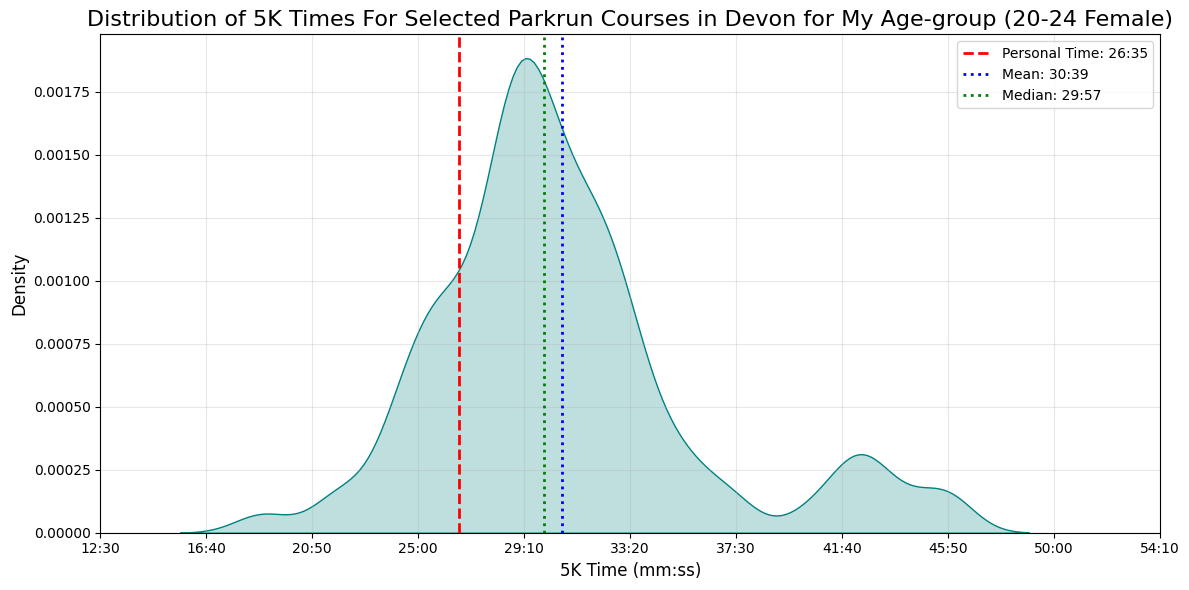

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

#reusing time to seconds funtion from above
df["Time (s)"] = df["Time"].apply(time_to_seconds)
clean_df = df.dropna(subset=["Time (s)"])

# My 5K time: 26:35
your_time_seconds = 26 * 60 + 35

# Plot KDE
plt.figure(figsize=(12, 6))
sns.kdeplot(data=clean_df, x="Time (s)", fill=True, color="teal", bw_adjust=0.5)

# Add vertical line for my time, mean, and median
plt.axvline(your_time_seconds, color="red", linestyle="--", linewidth=2, label="Personal Time: 26:35")
plt.axvline(average_seconds, color="blue", linestyle=":", linewidth=2, label=f"Mean: {average_time_str}")
plt.axvline(median_seconds, color="green", linestyle=":", linewidth=2, label=f"Median: {median_time_str}")

# Convert x-axis to mm:ss format
xticks = plt.xticks()[0]
xtick_labels = [str(datetime.timedelta(seconds=int(x)))[2:] for x in xticks]
plt.xticks(xticks, xtick_labels)

# Labels and styling
plt.title("Distribution of 5K Times For Selected Parkrun Courses in Devon for My Age-group (20-24 Female)", fontsize=16)
plt.xlabel("5K Time (mm:ss)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig("5k_time_distribution.png", dpi=300)  # Save the figure
plt.show()


